### Initial Imports

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import traceback
import os

# Monte Carlo Plots (SwarmCommSim)

### Mean Velocity Plotting

In [86]:
def get_mean_vels(path, scenario = "center_line_flock", model = "Disk",
                  flock_rad = 20, flock_vel = 7, num_agents = 10,
                  seed=11, axis=1,update_period = 10, group="custom"):
    # # f'./outputs/csv/{group}/{scenario}/{num_agents}
    base = path +f'{seed}/{model}-{float(flock_rad)}-{float(flock_vel)}-{float(update_period)}'
    if os.path.exists(f"{base}-pos.dat"):
        dfp=pd.read_csv(f"{base}-pos.dat", sep=',',header=None)
        dfv=pd.read_csv(f"{base}-vel.dat", sep=',',header=None)
    #     dfp.values.shape, dfv.values.shape


        fp = np.array([np.fromstring(p[0], dtype=float, sep=" ") for p in dfp.values])
        fv = np.array([np.fromstring(v[0], dtype=float, sep=" ") for v in dfv.values])

        positions = np.reshape(fp, (-1, num_agents, 3))[:, :, :2]
        velocities = np.reshape(fv, (-1, num_agents, 3))[:, :, :2]


        vels = velocities.mean(axis=axis)
        vels_std = velocities.std(axis=axis)
    
    else:
        # return 0 if network did not form
        vels = np.zeros((4,1))
        vels_std = np.zeros((4,1))
    return vels, vels_std


In [88]:
base = '/Users/nato/Downloads/botnet_data/'
spacings = [5, 10, 20, 40, 80]
seeds = range(11, 21)
# seeds = range(11, 13) #use fewer seeds for debugging

models = ["Disk", "FullyMeshed", "FriisMean", "Realistic", "FriisLower"]
data_per_model = {}
for model in models:
    spaced_vels = []
    #spacings = 
    for spacing in spacings:
        seeded_velos = []
        for seed in seeds:
            vels, vels_std = get_mean_vels(path=base, model=model, flock_rad=spacing, seed=seed)
#             seeded_velos.append((np.mean(np.sqrt(np.power(vels.T[0], 2) + np.power(vels.T[1], 2)))))
            velocity_values = np.linalg.norm(vels,axis=1)
            seeded_velos.append(np.mean(velocity_values))
        spaced_vels.append((np.median(seeded_velos), np.std(seeded_velos)))
    data_per_model[model] = spaced_vels

    

/Users/nato/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


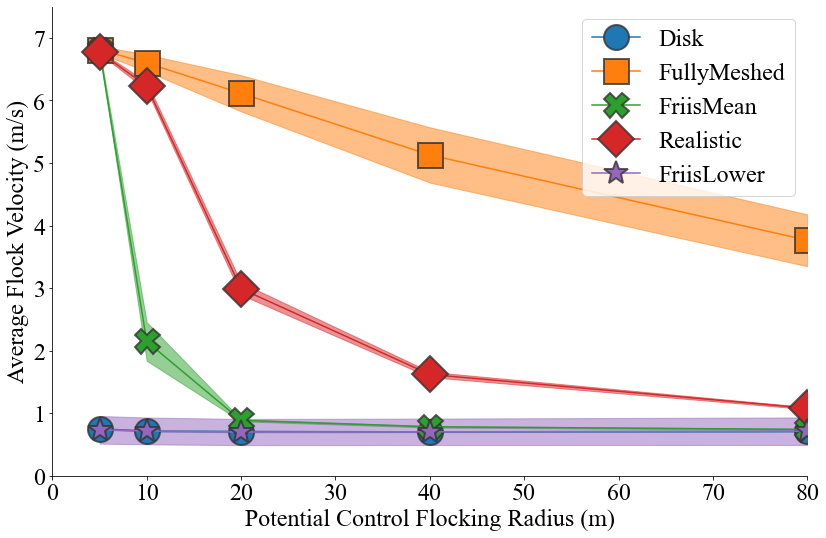

In [101]:
plt.clf()
plt.close()

# some plot stuff #### #### #### #### ####
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'  # blue-teal
]
markers = [
    "o", #circle
    "s", #square
    "X", #X filled
    "D", #Diamond
    "*", # star
]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "24"
plt.rcParams['figure.figsize'] = 12, 8
# plt.gcf().set_size_inches(10.5, 14.5)

fig = plt.figure() 
ax = fig.add_subplot(111) #fig = plt.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
k = 0

for model in models:
    spaced_vels = data_per_model[model]
    plt.plot(spacings, np.array(spaced_vels)[:,0], label=model, color = colors[k], marker=markers[k],markersize=25, markeredgewidth=2, markeredgecolor=(0.2, 0.2, 0.2, 0.8))
    plt.fill_between(spacings, np.array(spaced_vels)[:,0]- np.array(spaced_vels)[:,1], np.array(spaced_vels)[:,0]+ np.array(spaced_vels)[:,1],color = colors[k],alpha=0.5)
    k +=1
    
ax.set_ylim([0,7.5])
ax.set_xlim([0, 80])
plt.xlabel("Potential Control Flocking Radius (m)")
plt.ylabel("Average Flock Velocity (m/s)")
plt.legend()
plt.tight_layout()
# plt.title("Average Velocity for Different Flocking Radii")
fig.savefig("flock.pdf", dpi=400)
plt.show()



# Connectivity Illustration

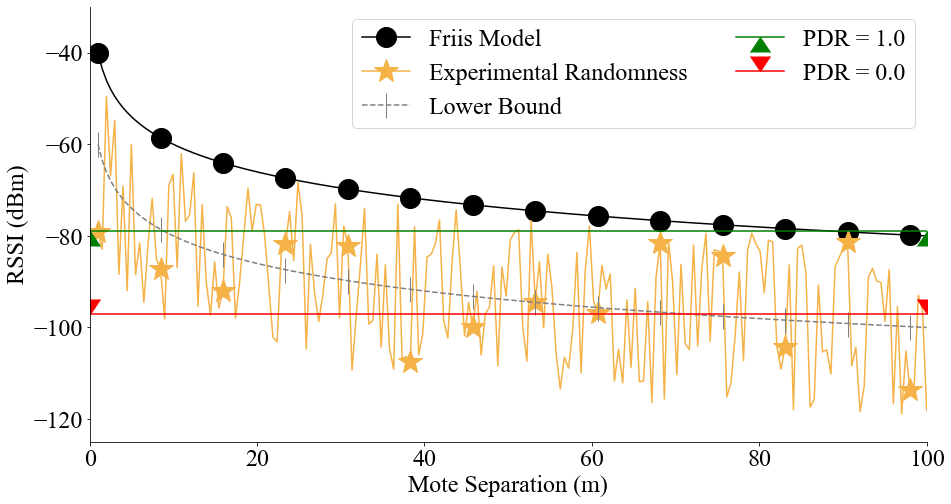

In [14]:
weight = 0.8

SPEED_OF_LIGHT = 3e8
TWO_DOT_FOUR_GHZ = 2.4e9

iprx = lambda rssi, off: SPEED_OF_LIGHT / (4 * np.pi * np.power(10, (rssi + off) / 20) * TWO_DOT_FOUR_GHZ)
iprx(-97, 40)

prx = lambda d : 20 * np.log10(SPEED_OF_LIGHT / (4 * np.pi * d * TWO_DOT_FOUR_GHZ)) # 0 - (20 * np.log10(d / (1000) * 2.4) + 92.45)
prx_rand = lambda d : prx(d) - 40 * np.random.rand(*d.shape)
prx_worst = lambda d, w=1 : prx(d) - w * 40

dists = np.linspace(1, 100, num=200)


# some plot stuff #### #### #### #### ####
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'  # blue-teal
]

markers = [
    "o", #circle
    "s", #square
    "X", #X filled
    "D", #Diamond
    "*", # star
]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "24"
plt.rcParams['figure.figsize'] = 13, 8
# plt.gcf().set_size_inches(10.5, 14.5)
fig = plt.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

 #### #### #### #### #### #### #### #### ####
# plt.tight_layout(w_pad=0.1)


x,y = np.meshgrid(np.linspace(-5, 105, num=300), np.linspace(-125, -35, num=300))
#plt.imshow(((y > -101+15)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Greens", alpha = 0.3);
# plt.imshow(((y >= -101) & (y <= -101+15)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Greys", alpha = 0.15);
#plt.imshow(((y < -101)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Reds", alpha = 0.3);

plt.plot(dists, prx(dists), color="black", label="Friis Model", marker="o", markevery=15,markersize=20)
plt.plot(dists, prx_rand(dists), color="#f4b247", label="Experimental Randomness", marker="*", markevery=15,markersize=25)
# plt.plot(dists, prx_worst(dists, 0.5), ":", color="black", label="Friis Model + Pister Hack (Average)", marker="s", markevery=15,markersize=20)
#plt.plot(dists, prx_worst(dists, weight), "-.", label=f"Pister Hack (Weighted {weight})")
plt.plot(dists, prx_worst(dists, 0.5), "--", color="grey", label="Lower Bound", marker="|", markevery=15,markersize=25)
plt.axhline(y=-79, color="green", label="PDR = 1.0", marker=6, markevery=1,markersize=20)
plt.axhline(y=-97, color="red", label="PDR = 0.0", marker=7, markevery=1,markersize=20)
#plt.axvline(x=3)
plt.legend(ncol=2)
plt.xlabel("Mote Separation (m)")
plt.ylabel("RSSI (dBm)")
# plt.title("2.4 GHz Range RF Propagation Model")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([-125,-30])
ax.set_xlim([0,100])
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.savefig("pister.pdf", dpi=400)
